In [ ]:
# -------------------------------PARTICLE SWARM OPTIMIZATION-------------------------------








## BASIC STEPS WHICH WERE FOLLOWED IN THE CODE:
### 1>CREATE RANDOM M PORTFOLIOS HAVING N ASSETS EACH
### 2>ASSIGN RADOM POSITIONS AND VELOCITES TO EACH OF THE ASSET IN EACH OF THE PORTFOLIO
### 3>ASSUME THAT THE FIRST PORTFOLIOTO BE THE  BEST AND LET IT BE GBEST.
### 4>THEN UPDATE THE POSTIONS OF ALL THE ASSETS IN A PORTFOLIO AND COMPARE WITH THEIR PREVIOUS POSTIONS  WRT SHARPE RATIO.
### 5>IF THE SHARPE RATIO OF THE UPDATED POSITION OF THE  PORTFOLIO IS GREATER THAN THE PREVIOUS POSITION OF THE PORTFOLIO,THEN   UPDATE THE   OLD POSITION WITH NEW POSITION AS IT IS HAVING HIGHER SHARPE RATIO,ELSE,NO CHANGES.
### 6>SAVE THE GREATER SHARE RATIO IN A LIST X.
### 7>REPEAT STEP 4,STEP 5,STEP 6 FOR ALL THE M PORTFOLIOS
### 8>AFTER ALL THE PORFOLIOS ARE COMPUTED,THEN FIND MAX(X) (X ,FROM STEP 5) AND THEN COMPARE MAX(X) WITH SHARPE RATIO OF THE GBEST PORTFOLIO(GBEST,FROM STEP 3)
### 9> IF THE SHARPE(MAX(X))>SHARPE(GBEST),UPDATE GBEST.
### 10>REPEAT STEP1 - STEP9 ,EXCEPT STEP3 BECAUSE WE NEED NOT HAVE TO ASSUME GBEST AS WE HAVE GOT GBEST FROM STEP 9,FOLLOW THE SAME PROCESS FOR P ITERATIONS, P IS USER CHOICE.
     

### ------------------------------------------------------------------------------------------------------------------------------------------------------------
## STEP 1(MODIFYING OUR DATASET)
### IMPORT REQUIRED PACKAGES AND IMPORTING THE MAIN CSV FILE

In [64]:
import pandas as pd
#raw data file also to be submitted
read_file = pd.read_excel ("Nifty50.xlsx") 

read_file.to_csv ("Nifty50.csv", index = None,header=True)

In [65]:
nifty_50_stocks_list_main = pd.read_csv('Nifty50.csv')
row=0

for date in range(len(nifty_50_stocks_list_main['Date'])):
    if nifty_50_stocks_list_main['Date'][date]!="2020-12-31":
        row+=1
    else:
        row+=1
        break        
nifty_50_stocks_list_main=nifty_50_stocks_list_main.iloc[:row,:]
nifty_50_stocks_list_main

,Date,ASIANPAINT,BAJFINANCE,BAJAJFINSV,BRITANNIA,DIVISLAB,HCLTECH,HDFCBANK,HINDALCO,HINDUNILVR,...,JSWSTEEL,KOTAKBANK,NESTLEIND,RELIANCE,SHREECEM,TCS,TATASTEEL,TECHM,TITAN,WIPRO
0,2016-01-01,850.608887,602.348328,1978.543457,1374.428223,1108.503052,385.106506,528.506653,82.550529,792.340698,...,93.927940,725.564270,5311.719238,486.556549,11121.029297,1082.013306,219.908173,461.389832,340.842285,202.975677
1,2016-01-04,852.593201,598.059875,1954.307739,1368.077148,1096.297607,385.152100,519.647644,78.515373,794.607056,...,95.546753,703.665161,5205.810547,476.948639,10804.255859,1061.057739,219.481003,458.151581,340.212952,203.431641
2,2016-01-05,871.807617,592.664673,1940.843384,1365.361816,1094.199951,383.717926,515.715759,80.314178,784.385376,...,99.058762,706.109497,5199.016113,481.668732,10867.756836,1051.810791,234.346603,463.031219,336.630768,203.139801
3,2016-01-06,858.013977,603.474854,1933.413330,1381.469727,1084.378296,383.080475,517.997192,78.320908,779.852783,...,96.781441,701.969116,5251.443359,494.631134,11188.242188,1066.431152,229.604980,465.870178,336.776001,202.483200
4,2016-01-07,844.413879,603.380981,1921.943726,1356.088257,1074.604370,375.636505,512.706055,74.528839,758.761841,...,93.868484,690.046875,5177.484863,485.550232,10725.758789,1061.796509,213.500595,453.183197,333.096954,200.568176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2020-12-24,2648.250000,5184.899902,8992.549805,3546.181152,3749.600098,905.757813,1397.099976,236.949997,2402.250000,...,366.250000,1960.599976,18465.892578,1994.150024,23826.750000,2889.689209,622.299988,947.250000,1495.900024,381.342682
1230,2020-12-28,2683.899902,5204.100098,8995.049805,3531.773926,3766.000000,908.171631,1412.849976,239.899994,2388.899902,...,386.600006,1988.900024,18496.724609,2003.300049,23715.550781,2909.603516,632.650024,947.099976,1543.550049,382.041077
1231,2020-12-29,2696.800049,5200.500000,8976.049805,3521.728271,3784.199951,922.063171,1427.199951,235.600006,2384.300049,...,381.799988,1999.300049,18163.837891,1990.050049,23839.650391,2910.696045,632.200012,965.650024,1540.099976,384.136383
1232,2020-12-30,2734.399902,5334.149902,8961.700195,3512.515381,3799.699951,926.792175,1432.500000,237.399994,2406.600098,...,386.100006,2017.949951,18279.806641,1995.500000,24599.949219,2889.639404,640.450012,983.250000,1552.599976,383.537720


### 1) STORING THE NAMES OF THE STOCKS/ASSETS  IN A DICTIONARY,DICTIONARY IS A INBUILT DATA STRUCTURE IN PYTHON WHICH WOULD STORE DATA IN FORM OF KEY:VALUE PAIRS,HERE KEY WOULD THE NAME OF THE ASSET AND VALUE WOULD THE STOCK NUMBER.


In [66]:
nifty_50_stocks_stock_names=list(nifty_50_stocks_list_main.iloc[-1:])[1:]
stock_names={}
for i in range(len(nifty_50_stocks_stock_names)):
    stock_names[nifty_50_stocks_stock_names [i]]=i+1
stock_names

{'ASIANPAINT': 1,
 'BAJFINANCE': 2,
 'BAJAJFINSV': 3,
 'BRITANNIA': 4,
 'DIVISLAB': 5,
 'HCLTECH': 6,
 'HDFCBANK': 7,
 'HINDALCO': 8,
 'HINDUNILVR': 9,
 'HDFC': 10,
 'ICICIBANK': 11,
 'INFY': 12,
 'JSWSTEEL': 13,
 'KOTAKBANK': 14,
 'NESTLEIND': 15,
 'RELIANCE': 16,
 'SHREECEM': 17,
 'TCS': 18,
 'TATASTEEL': 19,
 'TECHM': 20,
 'TITAN': 21,
 'WIPRO': 22}

###  CREATING A EMPTY DATAFRAME

### MAKING DATES AS INDEX AND  WE HAVE AN EXTRA COLUMN NAMED 'Unnamed: 0' , WHICH WE WOULD BE REMOVING BECAUSE WE DONT NEED IT

In [67]:
allData=pd.read_csv('Nifty50.csv',parse_dates=['Date'],index_col='Date')
allData = allData.iloc[:row,: ] 

trading_days=len(allData)
allData


,ASIANPAINT,BAJFINANCE,BAJAJFINSV,BRITANNIA,DIVISLAB,HCLTECH,HDFCBANK,HINDALCO,HINDUNILVR,HDFC,...,JSWSTEEL,KOTAKBANK,NESTLEIND,RELIANCE,SHREECEM,TCS,TATASTEEL,TECHM,TITAN,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,850.608887,602.348328,1978.543457,1374.428223,1108.503052,385.106506,528.506653,82.550529,792.340698,1169.114624,...,93.927940,725.564270,5311.719238,486.556549,11121.029297,1082.013306,219.908173,461.389832,340.842285,202.975677
2016-01-04,852.593201,598.059875,1954.307739,1368.077148,1096.297607,385.152100,519.647644,78.515373,794.607056,1130.328369,...,95.546753,703.665161,5205.810547,476.948639,10804.255859,1061.057739,219.481003,458.151581,340.212952,203.431641
2016-01-05,871.807617,592.664673,1940.843384,1365.361816,1094.199951,383.717926,515.715759,80.314178,784.385376,1123.546631,...,99.058762,706.109497,5199.016113,481.668732,10867.756836,1051.810791,234.346603,463.031219,336.630768,203.139801
2016-01-06,858.013977,603.474854,1933.413330,1381.469727,1084.378296,383.080475,517.997192,78.320908,779.852783,1123.453613,...,96.781441,701.969116,5251.443359,494.631134,11188.242188,1066.431152,229.604980,465.870178,336.776001,202.483200
2016-01-07,844.413879,603.380981,1921.943726,1356.088257,1074.604370,375.636505,512.706055,74.528839,758.761841,1095.722656,...,93.868484,690.046875,5177.484863,485.550232,10725.758789,1061.796509,213.500595,453.183197,333.096954,200.568176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,2648.250000,5184.899902,8992.549805,3546.181152,3749.600098,905.757813,1397.099976,236.949997,2402.250000,2455.149902,...,366.250000,1960.599976,18465.892578,1994.150024,23826.750000,2889.689209,622.299988,947.250000,1495.900024,381.342682
2020-12-28,2683.899902,5204.100098,8995.049805,3531.773926,3766.000000,908.171631,1412.849976,239.899994,2388.899902,2476.449951,...,386.600006,1988.900024,18496.724609,2003.300049,23715.550781,2909.603516,632.650024,947.099976,1543.550049,382.041077
2020-12-29,2696.800049,5200.500000,8976.049805,3521.728271,3784.199951,922.063171,1427.199951,235.600006,2384.300049,2518.949951,...,381.799988,1999.300049,18163.837891,1990.050049,23839.650391,2910.696045,632.200012,965.650024,1540.099976,384.136383


## CALCULATING NUMBER OF  YEARS WE HAVE IN THE DATASET

In [68]:
start_date=allData.index[0]                 #date of first row in the dataset (datetime format)
end_date=allData.index[len(allData)-1]        #date of last row in the dataset  (datetime format)
no_of_years=int((((end_date-start_date).days+1)/365))#the difference give the number of total days (not trading days) over the total number of years in the dataset
no_of_years

5

### HERE WE WOULD BE MODIFYING OUR DATASET IN A SUCH A WAY THAT THE NEW COLUMNS WOULD BE -(CLOSE,DAILY_RETURNS,NAME,STOCK_NO)
### NOTE->THE VALUES WOULD BE THE SAME AS IN THE ORIGINAL DATASET,BUT WE WOULD BE CHANGING THE COLUMNS AND THE REASON WHY WE ARE MODIFYING IS BECAUSE WE NEED VALUES LIKE DAILY RETURNS AS AN INPUT FOR OUR CODE

In [69]:
close=[] #1)close->adj close (Name change)
Name=[]
Stock_No=[]
Daily_Returns=[]


for i in allData:
    '''FOR EACH ASSET/STOCK'''
    t=list(allData[i]) #FINDING THE CLOSING PRICES FOR THE ASSET  
    close.append(t)# STORING THE [CLOSING PRICES] OF EACH ASSET IN THE LIST close
    Name.append(i) #STORING THE NAME OF THE STOCK
    t=list(allData[i].pct_change()) #FINDING THE DAILY RETURNS FOR THE STOCK

    Daily_Returns.append(t) #STORING THE [DAILY RETURNS] OF THE STOCK in  Daily_Returns
closed=[]

for i in close:  #HERE IN THIS CODE ,WE ARE TRYING TO PLACE ALL THE CLOSING PRICES IN A SINGLE LIST closed-----><1>

    for j in i:
        
        closed.append(j)


        
close=closed
Daily_Returnss=[]

for i in Daily_Returns:#HERE IN THIS CODE ,WE ARE TRYING TO PLACE ALL THE DAILY RETURNS IN A SINGLE LIST Daily_Returnss----><2>
    for j in i:
        Daily_Returnss.append(j)
Daily_Returns=Daily_Returnss

Names=[]

x=allData.shape[0] #FINDING NO OF ROWS, THE REASON IS EACH STOCK IS REPEATING X TIMES

for i in stock_names:                                                                    # ------><3>
    for j in range(x):
        Names.append(i)

Name=Names



    
modified_data = {}#EMPTY DICTIONARY
'''HERE FROM <1>,<2>,<3>,<4> WE WOULD BE STORING THE VALUES IN THE DICTIONARY'''
modified_data['close']=close
modified_data['Daily_Returns']=Daily_Returns
modified_data['Name']=Name


'''THEN CONVERTING modified_data INTO '''
modified_Data=pd.DataFrame(modified_data)
allData=modified_Data
allData

,close,Daily_Returns,Name
0,850.608887,NaN,ASIANPAINT
1,852.593201,0.002333,ASIANPAINT
2,871.807617,0.022536,ASIANPAINT
3,858.013977,-0.015822,ASIANPAINT
4,844.413879,-0.015851,ASIANPAINT
...,...,...,...
27143,381.342682,-0.008689,WIPRO
27144,382.041077,0.001831,WIPRO
27145,384.136383,0.005485,WIPRO
27146,383.537720,-0.001558,WIPRO


In [70]:
allData.isna().sum()

close             0
Daily_Returns    22
Name              0
dtype: int64

### REMOVING THE NAN VALUES(ie REMOVING THE ROWS CONTAINING NAN VALUES), THEN THE NEW DATASET WOULD BE CONTAINING 55818 ROWS, SO IT MEANS 42 ROWS HAVE BEEN REMOVED FROM THE PREVIOUS DATASET , THATS BECAUSE EACH ASSETS/STOCKS 1ST DAY DAILY RETURN WOULD BE NAN , SO THUS....

In [71]:
allData=allData.fillna(0)#.dropna(),it removes rows containing nan values

allData

,close,Daily_Returns,Name
0,850.608887,0.000000,ASIANPAINT
1,852.593201,0.002333,ASIANPAINT
2,871.807617,0.022536,ASIANPAINT
3,858.013977,-0.015822,ASIANPAINT
4,844.413879,-0.015851,ASIANPAINT
...,...,...,...
27143,381.342682,-0.008689,WIPRO
27144,382.041077,0.001831,WIPRO
27145,384.136383,0.005485,WIPRO
27146,383.537720,-0.001558,WIPRO


## STEP 2 (RUNNING THE MAIN FUNCTION WITH THE UPDATED DATASET)
### HERE IS THE MAIN FUNCTION FROM WHERE THE PROGRAM WOULD BASICALLY START

In [72]:
dimensions = len(stock_names)#No of stocks
'''
MARKING THE NO OF ITERATIONS TO BE 150(AS WE HAVE 11 STOCKS AND ACCORDING TO CONDITIONS BELOW):
->100 steps for the portfolios of 8 stocks
->200 steps for the portfolios of 15 stocks
->WE HAVE TAKEN AVERAGE AND CONSIDERED 150 ITERATIONS
<<<PAPER>>>
According to many testing, in the PSO solution, the termination condition is 100 steps for the portfolios of 8 stocks,
200 steps for the portfolios of 15 stocks, and 1000 steps
for the portfolios of 49 stocks.AS PER THE PAPER->"Particle Swarm Optimization (PSO) for the constrained portfolio optimization problem-Hanhong Zhu"
'''
'''Zhu & Wang (2011). Particle Swarm Optimization (PSO) for the constrained portfolio optimization problem, Expert Systems with Applications 38 (2011) 10161–10169.'''
iterations = 500 #We have 22 stocks, so I have chosen a  number between 200 and 1000; The above line is the proof.
'''
100 PARTICLES/PORTFOLIOS WERE USED BACK THEN.
 
AS PER THE PAPER->AS PER THE PAPER->"Particle Swarm Optimization (PSO) for the constrained portfolio optimization problem-Hanhong Zhu"
'''
'''Zhu & Wang (2011). Particle Swarm Optimization (PSO) for the constrained portfolio optimization problem, Expert Systems with Applications 38 (2011) 10161–10169.'''
swarm_size = 100 #No of portfolios
FINAL_PORTFOLIO = pd.DataFrame()
FINAL_WEIGHTS=pd.DataFrame()
mean_daily_returns = []  # IT WOULD CONTAIN THE AVG RETURS OF THE ASSETS
cov_input = []  # IT WOULD CONTAIN THE [DAILY RETURNS] OF THE ASSETS
neg_return=[]

for stock in stock_names:  # stock_names IS A DICTIONARY WHICH WE HAVE CREATED IN THE STEP 1 AND IT STORES THE NAMES OF THE ASSETS/STOCKS
    '''HERE IN THE MAIN FUNCTION WE WOULD BE APPENDING DAILY RETURNS OF EACH STOCK IN A 2D LIST/ARRAY(cov_input)
      AND AVG RETURNS OF THE ASSETS IN A 1D ARRAY(mean_daily_returns)'''
    indv_stock = allData[allData.Name == stock]
    
    
    avg_return = indv_stock.Daily_Returns.mean()
    '''mean_daily_returns would be containing avg returns of all the stocks in  a 1D ARRAY/LIST'''
    mean_daily_returns.append(avg_return)
    '''cov_input would be containing list of daily returns of all the stocks in  a 1D ARRAY/LIST,so basically cov_input would be a 2D ARRAY/LIST '''
    cov_input.append(indv_stock.Daily_Returns.tolist())

neg_return=cov_input[:]

mean_daily_returns = np.matrix(mean_daily_returns)  # CONVERTING 1D LIST(mean_daily_returns)INTO A MATRIX
cov_input = np.matrix(cov_input)  # CONVERTING A 2D LIST(cov_input)INTO A MATRIX
cov_matrix = np.cov(cov_input)  # CONVERTING MATRIX(cov_input)INTO A COVARIANCE MATRIX



for i in range(len(neg_return)):
    for j in range(len(neg_return[i])):
        if neg_return[i][j]>0:
            neg_return[i][j]=0
cov_input_neg= np.matrix(neg_return)
cov_matrix_neg = np.cov(cov_input_neg)


portfolio_return, portfolio_standard_deviation, portfolio_sharpe,portfolio_semi_deviation, portfolio_sortino, portfolio_weights = INITIALIZING_POSITIONS_AND_VELOCITIES(
    mean_daily_returns, cov_matrix,cov_matrix_neg)




'''
avg_sharpe_list, portfolio_return, portfolio_vol, portfolio_sharpe, portfolio_weights 
are basically lists which contains information of the best portfolios picked from each iteration
'''

print(
    "-------------------------------------------------------------------------------------------------------------------------------")
print(
    "-------------------------------------------------------------------------------------------------------------------------------")
print(
    "AS THE USER HAS GIVEN THE NO OF ITERATIONS TO BE {},SO WE HAVE {} BEST PORTFOLIOS,ONE FROM EACH ITERATION WHICH ARE SHOWN BELOW IN A DATAFRAME".format(
        iterations, iterations, iterations))
print(
    "-------------------------------------------------------------------------------------------------------------------------------")
print(
    "-------------------------------------------------------------------------------------------------------------------------------")
for i in range(len(portfolio_return)):  # CONVERTING RETURN VALUES INTO %
    portfolio_return[i] = np.round(portfolio_return[i] * 100, 3)

for i in range(len(portfolio_standard_deviation)):  # CONVERTING RISK VALUES INTO %
    portfolio_standard_deviation[i] = np.round(portfolio_standard_deviation[i] * 100, 3)

ITERATIONS=[]

for i in range(1,iterations+1):
    ITERATIONS.append(i)
for i in range(len(portfolio_semi_deviation)):  # CONVERTING RISK VALUES INTO %
    portfolio_semi_deviation[i] = np.round(portfolio_semi_deviation[i] * 100, 3)
ITERATIONS_OUTPUT={"ITERATION NO":ITERATIONS,"RETURNS":portfolio_return,"RISK/STANDARD DEVIATION":portfolio_standard_deviation,"SHARPE RATIO":portfolio_sharpe,"SEMI/DEVIATION":portfolio_semi_deviation,"SORTINO RATIO":portfolio_sortino}

ITERATIONS_OUTPUT=pd.DataFrame(ITERATIONS_OUTPUT)
weights=portfolio_weights[:]
for i in range(len(weights)):
    weights[i]=weights[i].tolist()[0]
    for j in range(len(weights[i])):
        weights[i][j]=np.round(weights[i][j]*100,2)
  
    



ITERATIONS_WEIGHT={"ITERATION NO":ITERATIONS,"WEIGHT":weights}

ITERATIONS_WEIGHT=pd.DataFrame(ITERATIONS_WEIGHT)

'''CREATING A DATAFRAME FOR PLACING ALL THE INFORMATIONS OF THE N DIFFERENT ITERATIONS'''

portfolios = {'Returns': portfolio_return,
              'Standard_deviation': portfolio_standard_deviation,
              'Sharpe_Ratio': portfolio_sharpe,
              'Semi_deviation': portfolio_semi_deviation,#main
              'Sortino_Ratio':portfolio_sortino,#main
              'Weights': portfolio_weights}

portfolios_df = pd.DataFrame(portfolios)
mreturns=portfolios_df.Returns.tolist()


mrisk=portfolios_df.Standard_deviation.tolist()



print(
    "FROM THE ABOVE DATAFRAME CONTAINING {} ITERAIONS BEST PORTFOLIOS, WE HAVE FIND THE PORTFOLIO HAVING THE HIGHEST SHARPE RATIO".format(
        iterations))
max_sharpe = portfolios_df['Sharpe_Ratio'].max()

print()
print()
print("MAXIMUM SHARPE RATIO: ", max_sharpe)
'''WE KNOW HAVE A DATAFRAME CONTAINING THE PORTFOLIO/PORTFOLIOS CONTAINING HIGHEST SHARPE RATIO'''
optimal_portfolio = portfolios_df.loc[portfolios_df['Sharpe_Ratio'] == max_sharpe]
optimal_portfolio=optimal_portfolio.iloc[:1,:]
    
print(
    "-------------------------------------------------------------------------------------------------------------------------------")
returns=''.join(map(str,(optimal_portfolio.Returns.tolist())))
print("OPTIMAL RETURN: ", returns)

print(
    "-------------------------------------------------------------------------------------------------------------------------------")
risk=''.join(map(str,(optimal_portfolio.Standard_deviation.tolist())))
semi_deviation=''.join(map(str,(optimal_portfolio.Semi_deviation.tolist())))
max_sortino=''.join(map(str,(optimal_portfolio.Sortino_Ratio.tolist())))
print("OPTIMAL RISK/STANDARD DEVIATION:" , risk)
print(
    "-------------------------------------------------------------------------------------------------------------------------------")

print('OPTIMAL WEIGHTS ACROSS ALL THE {} ASSETS AMONG  PORTFOLIO/PORTFOLIOS: '.format(dimensions))
final_portfolios=[]
weights=[]
names=[]
for item in optimal_portfolio.Weights:
    

    s = item.tolist()  # matrix into a  list for easier calculations
    s = s[0]   #2d matrix to 1d matrix
    l1 = []
    portfolio = {}
    p = 0
    for k in stock_names:  # mapping is alreaddy a created dictionary in step 1 containing all the names of the stocks
        portfolio[k] = np.round(s[p] * 100, 3)  # Trying to place asset:weight in a dictionary
        weights.append(portfolio[k])
        names.append(k)
        p += 1

    print("HOW MUCH SHOULD WE INVEST IN EACH OF THE ASSET?")
    print("HERE IS THE ANSWER!!!")
    print(portfolio)
    final_portfolios.append(portfolio)
    print(
        "----------------------------------------------------------------------------------------------------------------------------")

print(
    "-------------------------------------------------------------------------------------------------------------------------------")

main={"FINAL PORTFOLIO RETURNS":returns,"FINAL PORTFOLIO RISK":risk,"FINAL PORTFOLIO SHARPE RATIO":max_sharpe,"FINAL PORTFOLIO SEMI DEVIATION":semi_deviation,"FINAL PORTFOLIO SORTINO RATIO":max_sortino,"FINAL PORTFOLIO WEIGHTS":final_portfolios}
FINAL_PORTFOLIO =pd.DataFrame(main)
FINAL_PORTFOLIO.to_csv('FINAL_PORTFOLIO_PSO.csv')


---------------------------------------------------------------------------------------------------------------------
ITERATION NO  0
PORTFOLIO RETURN  28.4%
PORTFOLIO RISK/VOLATILITY/STANDARD DEVIATION 18.34%
PORTFOLIO SHARPE RATIO 1.35
PORTFOLIO SEMI DEVIATION 11.63%
PORTFOLIO SORTINO RATIO 2.13
---------------------------------------------------------------------------------------------------------------------
ITERATION NO  1
PORTFOLIO RETURN  27.6%
PORTFOLIO RISK/VOLATILITY/STANDARD DEVIATION 17.89%
PORTFOLIO SHARPE RATIO 1.34
PORTFOLIO SEMI DEVIATION 11.63%
PORTFOLIO SORTINO RATIO 2.07
---------------------------------------------------------------------------------------------------------------------
ITERATION NO  2
PORTFOLIO RETURN  27.6%
PORTFOLIO RISK/VOLATILITY/STANDARD DEVIATION 17.89%
PORTFOLIO SHARPE RATIO 1.34
PORTFOLIO SEMI DEVIATION 11.63%
PORTFOLIO SORTINO RATIO 2.07
-------------------------------------------------------------------------------------------------------

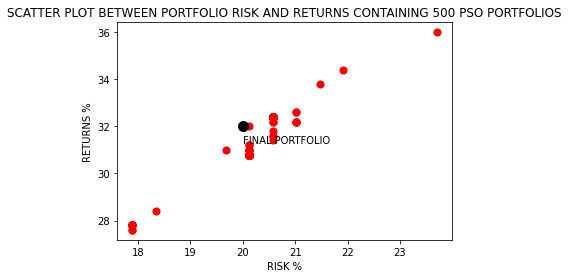

In [82]:


import math
import random
import matplotlib.pyplot as plt
plt.title('SCATTER PLOT BETWEEN PORTFOLIO RISK AND RETURNS CONTAINING 500 PSO PORTFOLIOS')
# create random data

# draw the plot
plt.scatter(mrisk, mreturns, c ="red", s =50)

risk=int(float(risk))
returns=int(float(returns))
plt.scatter(risk,returns, c ="black",s = 100)
plt.text(risk,returns,'FINAL PORTFOLIO',position=(risk,returns-0.7))
plt.xlabel("RISK %")
plt.ylabel("RETURNS %")
plt.show()

In [74]:
ITERATIONS_OUTPUT.to_csv('ITERATIONS_OUTPUT.csv')#PSO OPF
ITERATIONS_OUTPUT=pd.read_csv('ITERATIONS_OUTPUT.csv',index_col='ITERATION NO').iloc[:,1:]
ITERATIONS_OUTPUT
#OPF(OPTIMAL PORTFOLIO)
#PSO HPT

,RETURNS,RISK/STANDARD DEVIATION,SHARPE RATIO,SEMI/DEVIATION,SORTINO RATIO
ITERATION NO,,,,,
1,28.4,18.336,1.353639,11.628,2.134585
2,27.6,17.889,1.342759,11.628,2.065783
3,27.6,17.889,1.342759,11.628,2.065783
4,27.8,17.889,1.353939,11.628,2.082983
5,27.8,17.889,1.353939,11.628,2.082983
...,...,...,...,...,...
496,32.4,20.572,1.400945,13.416,2.148116
497,32.4,20.572,1.400945,13.416,2.148116
498,32.4,20.572,1.400945,13.416,2.148116


In [75]:
ITERATIONS_WEIGHT.to_csv('ITERATIONS_WEIGHT.csv')
ITERATIONS_WEIGHT=pd.read_csv('ITERATIONS_WEIGHT.csv',index_col='ITERATION NO').iloc[:,1:]

ITERATIONS_WEIGHT

,WEIGHT
ITERATION NO,
1,"[3.84, 8.15, 3.19, 6.5, 7.89, 3.75, 5.94, 5.56..."
2,"[6.98, 6.65, 3.74, 4.19, 3.87, 2.78, 5.75, 3.6..."
3,"[6.81, 7.17, 3.32, 4.13, 3.95, 2.67, 5.41, 3.1..."
4,"[5.49, 5.8, 2.34, 3.32, 3.87, 3.45, 5.16, 3.62..."
5,"[6.34, 7.34, 2.77, 3.95, 3.84, 2.42, 4.81, 3.1..."
...,...
496,"[1.67, 20.61, 3.37, 10.79, 5.64, 1.11, 1.63, 0..."
497,"[1.67, 20.61, 3.37, 10.79, 5.64, 1.11, 1.63, 0..."
498,"[1.67, 20.61, 3.37, 10.79, 5.64, 1.11, 1.63, 0..."


In [76]:

FINAL_PORTFOLIO #FINAL PSO OPF RETURN AND RISK

,FINAL PORTFOLIO RETURNS,FINAL PORTFOLIO RISK,FINAL PORTFOLIO SHARPE RATIO,FINAL PORTFOLIO SEMI DEVIATION,FINAL PORTFOLIO SORTINO RATIO,FINAL PORTFOLIO WEIGHTS
0,32.0,20.125,1.412201,12.969,2.1913466179497942,"{'ASIANPAINT': 1.686, 'BAJFINANCE': 19.918, 'B..."


In [77]:
main={ "STOCK NAMES":names,"WEIGHTS":weights}
FINAL_PORTFOLIO_WEIGHTS=pd.DataFrame(main)
FINAL_PORTFOLIO_WEIGHTS.to_csv("FINAL_PORTFOLIO_WEIGHTS.csv")#FINAL PSO OPTIMAL PORTFOLIO WEIGHTS
FINAL_PORTFOLIO_WEIGHTS

,STOCK NAMES,WEIGHTS
0,ASIANPAINT,1.686
1,BAJFINANCE,19.918
2,BAJAJFINSV,1.632
3,BRITANNIA,9.443
4,DIVISLAB,4.646
5,HCLTECH,1.618
6,HDFCBANK,1.789
7,HINDALCO,0.018
8,HINDUNILVR,13.831
9,HDFC,0.250


## STEP 3 (RUNNING THE OPTIMIZER)
### STEP 3.1 (INITIALIZING RANDOM POSITIONS AND VELOCITIES TO ALL THE PARTICLES(ASSETS))
####  HERE IN THE INITIALIZING_POSITIONS_AND_VELOCITIES FUNCTION, WE WOULD GIVING RANDOM POSITIONS AND VELOCITIES TO EACH OF THE ASSET/STOCK IN EACH PORTFOLIO

In [35]:
def INITIALIZING_POSITIONS_AND_VELOCITIES(mean_daily_returns, cov_matrix,cov_matrix_neg):
    '''INITIALIZING RANDOM POSITIONS(WEIGHTS) FOR ALL THE 100
    *11 ASSETS'''
    swarm_position = []
    swarm_velocity = []
    for particle in range(swarm_size):      #SWARM SIZE->PORTFOLIO             
        '''FOR EACH NEW PORTFOLIO, WE WOULD CREATING A LIST (position)'''
        position = [0]*dimensions   
        velocity = [0]*dimensions
        for dimension in range(dimensions):  #DIMENSIONS->ASSET
                                                    
            position[dimension] = random.random()  #random.random() would assign some random number between 0 and 1  
            velocity[dimension] = random.random()
        '''position LIST OF EVERY NEW PORTFOLIO WOULD BE KEPT IN A SEPARATE LIST(swarm_position)'''
        swarm_position.append(position)   
        swarm_velocity.append(velocity)
        
    swarm_position = np.array([np.array(p) for p in swarm_position]) # COVERTING  swarm_position  list to an array
    swarm_velocity = np.array([np.array(v) for v in swarm_velocity])  # COVERTING  swarm_velocities  list to an array
    
    return PSO_OPTIMIZER(swarm_position,swarm_velocity,mean_daily_returns, cov_matrix,cov_matrix_neg)

### STEP 3.2(RUNNING THE MAIN CODE )
#### HERE IN THE PSO_OPTIMIZER FUNCTION WE WOULD BE COMPARING THE CHANGED POSTION OF THE PORTFOLIO WITH THE OLD POSITION OF THE PORTFOLIO WRT SHARPE RATIO,THEN AFTER LOOPING THROUGH ALL THE PORTFOLIOS WE WOULD BE GETTING GLOBAL BEST PORTFOLIO

### NOTE 1: OLD POSITIONS ARE NOTHING BUT THE INITIAL POSITIONS WHICH WE HAVE GENERATED IN INITIALIZING_POSITIONS_AND_VELOCITIES()

### NOTE 2: ALL THE OLD POSITIONS OF THE PORTFOLIOS ARE STORED IN  initial_swarm_positions IN THE BELOW CODE

In [36]:
def PSO_OPTIMIZER(swarm_position,swarm_velocity,mean_daily_returns, cov_matrix,cov_matrix_neg):
    ''' w,c1,c2 ARE PARAMETERS WHICH WOULD HELP IN CHANGING THE PARTICLE(ASSET) POSITIONS'''
   
    '''initial_swarm_positions IS A LIST , CONTAINING ALL THE INITIAL POSITIONS OF ALL THE ASSETS OF ALL THE PORTFOLIOS'''
    initial_swarm_positions = swarm_position #HERE IS THE MASTER FILE WHICH WE WOULD BE USING FOR COMPARISON
    '''swarm_gbest,WE ARE ASSUMING THAT THE FIRST PORTFOLIO IS THE BEST OPTION AVAILABLE '''
    swarm_gbest = initial_swarm_positions [0] 
    
    avg_sharpe_list = []
    portfolio_return = []
    portfolio_standard_deviation = []
    portfolio_sortino = []
    portfolio_semi_deviation = []
    portfolio_sharpe = []
    portfolio_weights = []
    
    for iteration in range(iterations):
        '''FOR EACH ITERATION'''
        '''sharpe_pbest_all is a list which would contain the sharpe ratio of the portfolios,Finally at the end it would containing 100 sharpe ratios'''
        sharpe_pbest_all = []   
        for particle in range(swarm_size):#SWARM_SIZE->PORTFOLIOS 
            '''FOR EACH PORTFOLIO'''
            for dimension in range(dimensions):#DIMENSIONS->ASSETS
                '''FOR EACH ASSET'''
                '''HERE , WE WOULD BE UPDATING THE POSITIONS AND VELOCITES OF EACH OF THE ASSET PRESENT IN A PARTICULAR PORTFOLIO'''
                r1 = random.random() # random.random() WOULD BASICALLY GIVE YOU A VALUE BETWEEN 0 AND 1
                r2 = random.random()
                '''HERE WE WOULD BE CHANGING THE PRESENT PARTICLE(ASSET) POSITION 
                   AND FOR CHANGING THE POSITION,WE NEED TO CALCULATE THE NEW VELOCITY'''
    
                '''BASIC FORMULA 
                   NEW VELOCITY->w*PRESENT VELOCITY + c1 * r1 * abs(INTIAL POSITION - PRESENT POSITION)+c2*r2*abs(GBEST POSITION - PRESENT POSITION)
                   NEW POSITION->PRESENT POSITION + NEW VELOCITY
                '''
                w = (0.9 - 0.4)*((iterations - iteration)/iterations) + 0.4 # w at iteration, where initial_w = 0.9 & final_w = 0.4
                c1 = (0.5 - 2.5)*(iteration/iterations) + 2.5 # c1 at iteration, where min_c1 = 0.5 & max_c1 = 2.5
                c2 = (2.5 - 0.5)*(iteration/iterations) + 0.5 # c2 at iteration, where max_c2 = 2.5 & min_c2 = 0.5
                swarm_velocity[particle][dimension] = w * swarm_velocity[particle][dimension] + c1 * r1 * abs(initial_swarm_positions[particle][dimension] - swarm_position[particle][dimension]) + c2 * r2 * abs(swarm_gbest[dimension] - swarm_position[particle][dimension]) # Update velocity in every dimension
                swarm_position[particle][dimension] = swarm_position[particle][dimension] + swarm_velocity[particle][dimension] # Update position in every direction
            
            
            #AFTER 1 COMPLETE PORTFOLIO
            
            
            '''AFTER CHANGING THE POSITIONS OF ALL THE ASSETS IN A PARTICULAR PORTFOLIO, WE WOULD FIND THE SHARPE RATIO OF THIS PORTFOLIO
               AND WE WOULD STORE IT IN sharpe_pbest'''
            sharpe_pbest = SHARPE(initial_swarm_positions[particle], mean_daily_returns, cov_matrix) #Evaluating sharpe of existing pbest position
   
            '''THEN WE WOULD BE COMPARING THE sharpe_pbest WITH THE SHARPE RATIO OF THE INITIAL PORTFOLIO WHICH IS STORED IN initial_swarm_positions
               ie COMPARING SHARPE RATIO OF THE PORTFOLIO OLD POSITION WITH SHARPE RATIO OF THE PORTFOLIO NEW POSITION'''
        
            if SHARPE(swarm_position[particle], mean_daily_returns, cov_matrix) > sharpe_pbest:
                '''IS THE NEW POSITION BETTER THAN THE EXISTING ONE'''
                '''IF THE NEW POSITION IS BETTER, THEN UPDATE sharpe_pbest  and initial_swarm_positions[particle]'''
                initial_swarm_positions[particle] = swarm_position[particle] #Update pbest to new position
                sharpe_pbest = SHARPE(initial_swarm_positions[particle], mean_daily_returns, cov_matrix) #Update sharpe of pbest
            '''IF THE PORTFOLIO WITH NEW POSITION HAS HIGHER SHARPE RATIO THAN
               THE OLD POSITION,APPEND SHARPE RATIO OF THE PORTFOLIO WRT TO NEW POSTION,
               ELSE APPEND SHARPE RATIO OF THE PORTFOLIO WRT TO OLD POSTION '''
            sharpe_pbest_all.append(sharpe_pbest) 
            '''AFTER ALL THE PORTFOLIOS(ie,AFTER ONE ITERATION) ARE DONE, WE WOULD SELECT THE BEST PORTFOLIO
               WRT OF SHARPE RATIO AND COMPARE IT WITH THE SHARPE RATIO OF GLOBAL BEST(swarm_gbest PORTFOLIO)'''
            
            
        #AFTER 1 COMPLETE ITERATION
        
        
        if max(sharpe_pbest_all) > SHARPE(swarm_gbest, mean_daily_returns, cov_matrix): 
            ''' IS THE LARGEST SHARPE RATIO OF ALL THE PORTFOLIOS BETTER THEN gbest?'''
            ''' IF YES, CHANGE THE gbest to max(sharpe_pbest_all)'''
            max_index = sharpe_pbest_all.index(max(sharpe_pbest_all)) 
            swarm_gbest = initial_swarm_positions [max_index] 
        
      
        '''AFTER 1 ITERATION IS DONE,ie GOING THROUGH ALL THE PORTFOLIOS AND FINDING THE BEST PORTFOLIO,
           WE WOULD NOW PRINT THE VALUES
        '''
        ''' CALCULATING THE AVG SHARPE RATIO FOR THE ITERATION '''
        avg_sharpe = sum(sharpe_pbest_all)/len(sharpe_pbest_all) 
        
        avg_sharpe_list.append(avg_sharpe)
        '''NOW FOR PRINTING THE IMPORTANT DATA FROM EACH ITERATION, WE HAVE CREATED A SEPARATE FUNCTION(PRINT_EACH_ITERATION)'''
        portfolio_return, portfolio_standard_deviation, portfolio_sharpe,portfolio_semi_deviation, portfolio_sortino,  portfolio_weights = PRINT_EACH_ITERATION(iteration, swarm_gbest, mean_daily_returns, cov_matrix,cov_matrix_neg, portfolio_return, portfolio_standard_deviation, portfolio_sharpe,portfolio_semi_deviation, portfolio_sortino,  portfolio_weights)
    '''AFTER ALL THE ITERATIONS ARE DONE, WE WOULD RETURN ALL THE INFORMATION OF ALL THE ITERATIONS TO THE MAIN FUNCTION'''
    
    
    #AFTER ALL THE ITERATIONS
    
    return portfolio_return, portfolio_standard_deviation, portfolio_sharpe,portfolio_semi_deviation, portfolio_sortino, portfolio_weights


### -----------------------------------------------------------------------------------------------------------------------------------------------------------
### According to the paper by M. Clerc and J. Kennedy [3] to define a standard for Particle Swarm Optimization, the best static parameters are w=0.72984 and c1 + c2 > 4. More exactly c1 = c2 = 2.05. Additionally, the linear decay of the parameter w was initially proposed by Yuhui and Russ Y. H. Shi and R. C. Eberhart [4].
### ------------------------------------------------------------------------------------------------------------------------------------------------------------
### http://www.swarmintelligence.org/tutorials.php(POSITION AND VELOCITY FORMULA)


### STEP 3.3 (CALCULATING THE SHARPE RATIO)
#### HERE IN THE SHARPE FUNCTION, WE WOULD BE FINDING THE SHARPE RATIO OF THE PORTFOLIO.


In [37]:

def SHARPE(weights, mean_daily_returns, cov_matrix):

    
    weights = [w/sum(weights) for w in weights] # Making sure all weights represent proportions that add up to 1
    weights = np.matrix(weights)
    port_return = np.round(np.sum(weights * mean_daily_returns.T) * trading_days, 2)/(no_of_years) # 1259 trading days over 5 year period
    port_std_dev = np.round(np.sqrt(weights * cov_matrix * weights.T) * np.sqrt(trading_days), 2)/np.sqrt(no_of_years)
    port_std_dev = float(port_std_dev)
    sharpe_ratio = (port_return - 0.0358)/port_std_dev   # 2.57 represents annual return of risk free security - 5-year US Treasury

    return sharpe_ratio

In [38]:
def SORTINO(weights, mean_daily_returns,cov_matrix_neg):
    
    ''' MAKING SURE THAT ALL THE WEIGHTS OF THE PORTFOLIO EQUALS TO 1'''
    weights = [w/sum(weights) for w in weights]
    ''' CONVERTING weights TO A  MATRIX'''
    weights = np.matrix(weights)
    ''' CALCULATING THE PORTFOLIO RETURNS'''
    port_return = np.round(np.sum(weights * mean_daily_returns.T) *trading_days , 2)/no_of_years  #5yrs+91 days forecasted data from dhiraj's output,thus 5.25 yrs in total
                                                                                   
   
    
    port_semi_dev = np.round(np.sqrt(weights * cov_matrix_neg * weights.T) * np.sqrt(trading_days), 2)/np.sqrt(no_of_years)
    port_semi_dev = float(port_semi_dev)
    #referred from url: https://www.rbi.org.in/Scripts/BS_NSDPDisplay.aspx?param=4&Id=24292
    #In the above url, the 364 (1 year) day treasury bill is 3.58% , when taken absolute value => 0.0358
    sortino_ratio= (port_return-0.0358)/ (port_semi_dev) #RFR FOR 2020->3.58%

    return sortino_ratio


### STEP 3.4 (PRINTING THE INFORMATION OF A PARTICULAR  ITERATION)
### NOTE:portfolio_return, portfolio_vol, portfolio_sharpe, portfolio_weights ARE BASICALLY EMPTY LISTS, IN WHICH WE  WOULD BE APPENDING THE VALUES,SO FOR THE 1ST ITERATION,THE LISTS WOULD BE EMPTY
### HERE IN THIS CODE, WE WOULD BE PRINTING THE NEEDFUL INFORMATION OF THE BEST PORTFOLIO FROM A PARTICULAR ITERATION


In [39]:
def PRINT_EACH_ITERATION(i, weights, mean_daily_returns, cov_matrix,cov_matrix_neg, portfolio_return, portfolio_standard_deviation, portfolio_sharpe,portfolio_semi_deviation,portfolio_sortino, portfolio_weights):
    ''' MAKING SURE THAT ALL THE WEIGHTS OF THE PORTFOLIO EQUALS TO 1'''

    weights = [w/sum(weights) for w in weights] # Making sure all weights represent proportions that add up to 1
    weights = np.matrix(weights)
    port_return = np.round(np.sum(weights * mean_daily_returns.T) * trading_days, 2)/(no_of_years) # 1259 trading days over 5 year period
    port_std_dev = np.round(np.sqrt(weights * cov_matrix * weights.T) * np.sqrt(trading_days), 2)/np.sqrt(no_of_years)
    port_std_dev = float(port_std_dev)
    sharpe_ratio = (port_return - 0.0358)/port_std_dev   # 3.58 represents annual return of risk free security - 5-year US Treasury
    port_semi_dev = np.round(np.sqrt(weights * cov_matrix_neg * weights.T) * np.sqrt(trading_days), 2)/np.sqrt(no_of_years)
    port_semi_dev = float(port_semi_dev)
    sortino_ratio= (port_return-0.0358)/ (port_semi_dev) 
    print("---------------------------------------------------------------------------------------------------------------------")
    print("ITERATION NO ", i)
    print("PORTFOLIO RETURN ", str(np.round(port_return*100,2))+"%")
    print("PORTFOLIO RISK/VOLATILITY/STANDARD DEVIATION", str(np.round(port_std_dev*100,2))+"%")
    print("PORTFOLIO SHARPE RATIO", np.round(sharpe_ratio,2))
    print("PORTFOLIO SEMI DEVIATION", str(np.round(port_semi_dev*100,2))+"%")
    print("PORTFOLIO SORTINO RATIO", np.round(sortino_ratio,2))


    portfolio_return.append(port_return) # Adding portfolio return of a given PORTFOLIO  to  portfolio_return
    portfolio_standard_deviation.append(port_std_dev) # Adding portfolio standard deviation of a given PORTFOLIO to a list of standard deviations to portfolio_vol
    portfolio_sharpe.append(sharpe_ratio)# Adding portfolio sharpe ratio of a given PORTFOLIO  to   portfolio_sharpe
    portfolio_semi_deviation.append(port_semi_dev) # Adding portfolio standard deviation of a given PORTFOLIO to a list of standard deviations to portfolio_vol
    portfolio_sortino.append(sortino_ratio)# Adding portfolio sharpe ratio of a given PORTFOLIO  to   portfolio_sharpe
    portfolio_weights.append(weights)# Adding portfolio weights of a given PORTFOLIO  to   portfolio_sharpe 

    return portfolio_return, portfolio_standard_deviation, portfolio_sharpe,portfolio_semi_deviation, portfolio_sortino, portfolio_weights


### 1> The test results indicate that the ACO is much more robust and effective than Particle swarm optimization (PSO), especially for low-risk investment portfolios.
### https://link.springer.com/chapter/10.1007/978-3-642-17563-3_29

In [112]:
'''
import matplotlib.pyplot as plt
%matplotlib inline
def VISUALIZATIONS(portfolios):
    return RISK_VS_RETURNS(portfolios)

'''
   

In [113]:
'''
def RISK_VS_RETURNS(portfolios):
     plt.scatter(portfolios['Volatility'], portfolios['Returns'],alpha=0.2)
    '''

In [1]:
import pandas as pd